<a href="https://colab.research.google.com/github/kiranp7/Heart_Disease_Prediction/blob/main/heart_diseases_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [94]:
df=pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")

In [95]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [97]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [98]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Text(0.5, 1.0, 'Age vs BP')

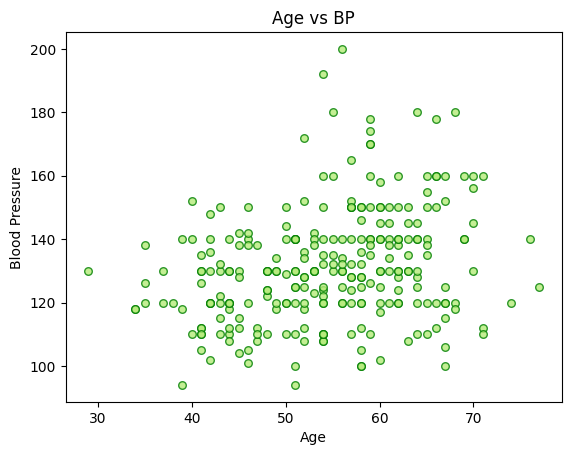

In [147]:
plt.scatter(df['Age'],df['BP'], s=30, c = '#b6eb7a', edgecolor = 'green', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs BP')

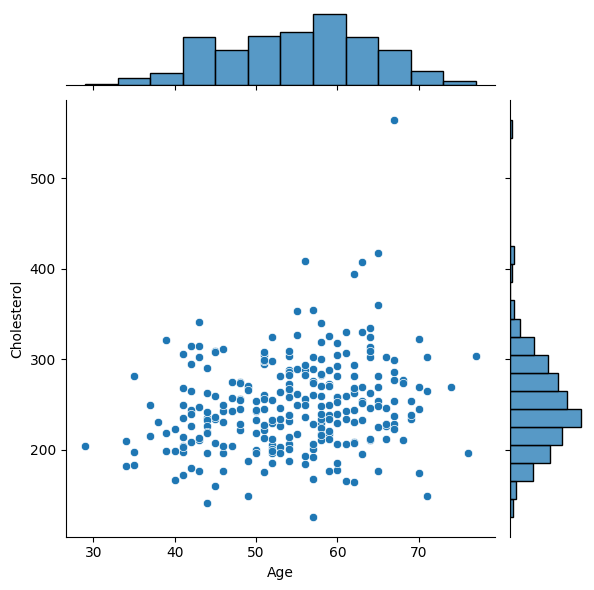

In [154]:
sns.jointplot(x=df['Age'], y=df['Cholesterol'], data=df)

**Logistic Regression**

In [100]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [101]:
df['Heart Disease']=df['Heart Disease'].map({'Presence':1,'Absence':0})

In [102]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [103]:
y=df['Heart Disease']
X=df.drop('Heart Disease',axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [107]:
classsifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [108]:
classsifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: So

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [109]:
print(classsifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [110]:
print(classsifier_regressor.best_score_)

0.8244186046511628


In [111]:
y_pred=classsifier_regressor.predict(X_test)

In [112]:
score=accuracy_score(y_pred,y_test)
score

0.9074074074074074

**DECISION TREE**

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
tree_model=DecisionTreeClassifier()

In [115]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5147058823529411, 0.9545454545454546, 'x[2] <= 0.329\ngini = 0.497\nsamples = 216\nvalue = [117, 99]'),
 Text(0.3014705882352941, 0.8636363636363636, 'x[9] <= 1.151\ngini = 0.313\nsamples = 108\nvalue = [87, 21]'),
 Text(0.22058823529411764, 0.7727272727272727, 'x[12] <= -0.133\ngini = 0.241\nsamples = 100\nvalue = [86, 14]'),
 Text(0.14705882352941177, 0.6818181818181818, 'x[4] <= 0.426\ngini = 0.123\nsamples = 76\nvalue = [71, 5]'),
 Text(0.08823529411764706, 0.5909090909090909, 'x[3] <= -1.276\ngini = 0.034\nsamples = 57\nvalue = [56, 1]'),
 Text(0.058823529411764705, 0.5, 'x[4] <= -0.344\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.029411764705882353, 0.4090909090909091, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.08823529411764706, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11764705882352941, 0.5, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(0.20588235294117646, 0.5909090909090909, 'x[9] <= 0.215\ngini = 0.332\nsamples = 

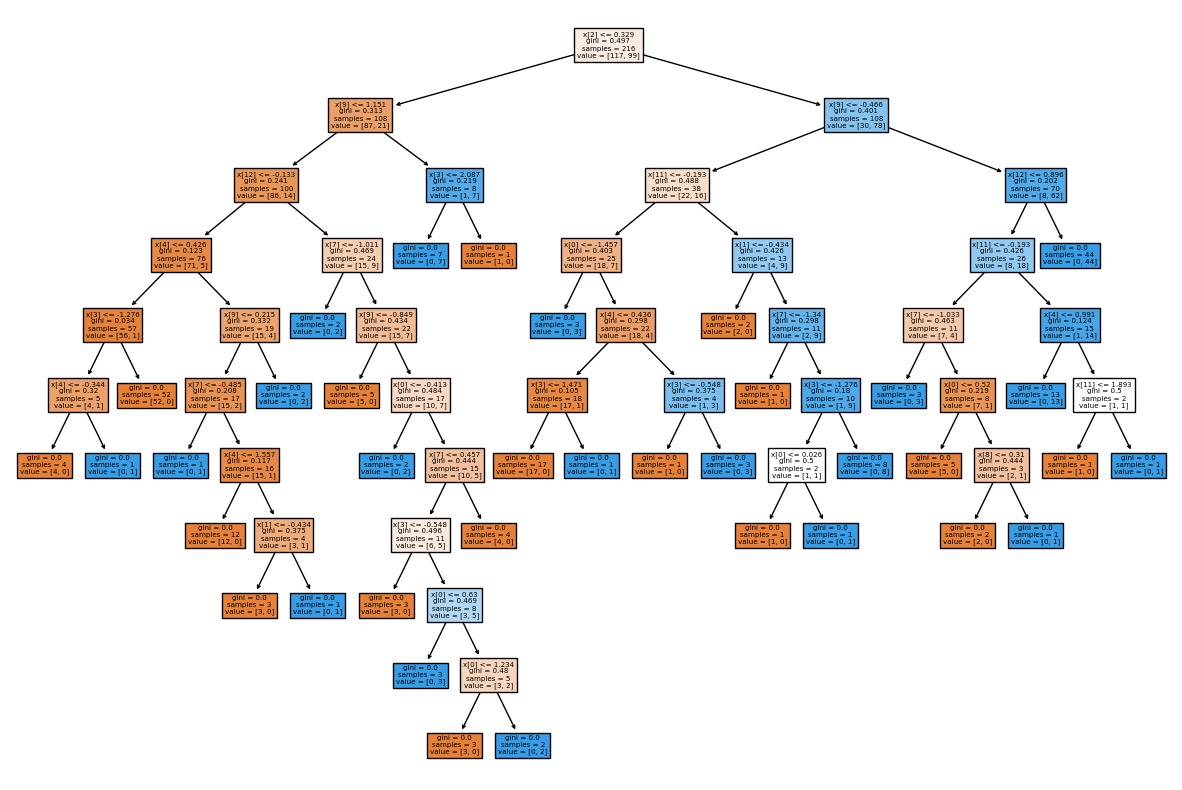

In [116]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)

In [117]:
y1_pred = tree_model.predict(X_test)

In [118]:
score = accuracy_score(y_test,y1_pred)
score

0.7037037037037037

**RANDOM FOREST**

In [143]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 400, criterion = 'entropy', random_state = 0)
classifier.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=0)

In [144]:
Y_Pred = classifier.predict(X_test)

In [145]:
c = confusion_matrix(y_test, Y_Pred)
c

array([[32,  1],
       [ 6, 15]])

In [146]:
accuracy=accuracy_score(y_test,Y_Pred)
accuracy

0.8703703703703703

**KNN**

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [125]:
y_pred = classifier.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred)

0.8148148148148148

**SVM**

In [127]:
from sklearn.svm import SVC

In [128]:
svm_classifier = SVC(kernel='linear',C=1)


In [129]:
svm_classifier.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [137]:
y3_pred = svm_classifier.predict(X_test)

In [138]:
accuracy_score(y_test,y3_pred)

0.8888888888888888

**NaiveBayes**

In [132]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[0.85416667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ],
       [0.79166667, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        1.        ],
       [0.58333333, 1.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.5625    , 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.        ],
       [0.58333333, 1.        , 1.        , ..., 0.5       , 0.        ,
        0.75      ],
       [0.79166667, 1.        , 1.        , ..., 0.5       , 1.        ,
        0.        ]])

In [140]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)


y_pred1 = gnb.predict(X_test)

In [142]:
f= confusion_matrix(y_test,y_pred1)
print(f)

[[32  1]
 [ 4 17]]


In [141]:
accuracy_score(y_test,y_pred1)

0.9074074074074074

CONCLUSION OF HEART DISEASE PREDICTION
We did data visualization and data analysis of the target variable

THE ACCURACY SCORE WE GOT USING LOGISTIC REGRESSION IS - 90.74%

THE ACCURACY SCORE WE GOT USING DECISION TREE IS - 70.37%

THE ACCURACY SCORE WE GOT USING RANDOM FOREST TREE IS - 81.48%

THE ACCURACY SCORE WE GOT USING KNN IS - 81.487%

THE ACCURACY SCORE WE GOT USING SVM IS - 88.88%

THE ACCURACY SCORE WE GOT USING NAIVEBAYES IS - 90.74

HERE LOGISTIC REGRESSION AND NAIVEBAYES GIVES MORE ACCURACY